
# ПРОЕКТ


Ниже представлено решение тестового задания для образовательной платформы.
Инструменты: Python, SQL, A/B - тестирование.


## Задание 1. A/B–тестирование


1.1 Условие

Одной из основных задач аналитика в нашей команде является корректное проведение 
экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования 
одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, 
у контрольной группы оставалась базовая механика. В качестве задания вам необходимо 
проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику 
оплаты на всех пользователей.

1.2 Входные данные

В качестве входных данных вы имеете 4 csv-файла:

groups.csv – файл с информацией о принадлежности пользователя к контрольной или 
экспериментальной группе (А – контроль, B – целевая группа) 

groups_add.csv – дополнительный файл с пользователями, который вам прислали спустя 
2 дня после передачи данных

active_studs.csv – файл с информацией о пользователях, которые зашли на платформу 
в дни проведения эксперимента. 

checks.csv – файл с информацией об оплатах пользователей в дни проведения эксперимента. 

1.3 Вопросы

Предлагаем вам ответить на следующие вопросы:

На какие метрики вы смотрите в ходе анализа и почему?
Имеются ли различия в показателях и с чем они могут быть связаны?
Являются ли эти различия статистически значимыми?
Стоит ли запускать новую механику на всех пользователей?
Данный список вопросов не является обязательным, и вы можете при своём ответе 
опираться на собственный план.

1.4 Требования к ответу

При выполнении тестового задания необходимо использовать язык программирования Python. 
В файле обязательно должны быть комментарии к тем действиям, которые вы выполняете с данными. 
Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.

<span style="font-size: 18px;">В результате проведения A/B–эксперимента были получены данные о фактах активности и совершения оплаты пользователей из контрольной и тестовой групп. 
Файлы размещены на Яндекс-диске, выгрузка для расчётов производится непосредственно с облака.</span>

### Выгрузка и предварительный анализ данных

In [1]:
import pandas as pd
import pingouin as pg
import scipy.stats as st
import requests
from urllib.parse import urlencode
import seaborn as sns
import matplotlib.pyplot  as plt

/opt/conda/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# Сохраняем базовую ссылку на Яндекс-диск в переменную.Будет использоваться для загрузки всех файлов.
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

In [3]:
# Загрузка 'groups.csv' – файл с информацией о принадлежности пользователя к контрольной или 
# экспериментальной группе (А – контроль, B – целевая группа) 

# Сохраняем ссылку на файл на Яндекс-диске в переменную.
public_key_groups = 'https://disk.yandex.ru/d/UhyYx41rTt3clQ'

# Получаем загрузочную ссылку/ Подготовка ссылки на скачивание
final_url_groups = base_url + urlencode(dict(public_key=public_key_groups))
response_groups = requests.get(final_url_groups)  # запрос ссылки на скачивание
download_url_groups = response_groups.json()['href']  # 'парсинг' ссылки на скачивание

# Загружаем данные в DataFrame
df_groups = pd.read_csv(download_url_groups, sep=';', comment='#' , encoding='cp1251')
df_groups.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [5]:
df_groups.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [6]:
df_groups.id.nunique()  # все id в первом списке уникальны

74484

<span style="font-size: 18px;">Всего в исходном файле(groups.csv) с распределением по группам находится 74 484 пользователя.</span>

In [4]:
# Загрузка 'groups_add.csv' – дополнительный файл с пользователями, который вам прислали 
# спустя 2 дня после передачи данных 

# Сохраняем ссылку на файл на Яндекс-диске в переменную.
public_key_groups_add = 'https://disk.yandex.ru/d/5Kxrz02m3IBUwQ'

# Получаем загрузочную ссылку/ Подготовка ссылки на скачивание
final_url_groups_add = base_url + urlencode(dict(public_key=public_key_groups_add))
response_groups_add = requests.get(final_url_groups_add)  # запрос ссылки на скачивание
download_url_groups_add = response_groups_add.json()['href']  # 'парсинг' ссылки на скачивание

# Загрузка данных в DataFrame
df_groups_add = pd.read_csv(download_url_groups_add, sep=',', comment='#' , encoding='cp1251')
df_groups_add.head()

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [5]:
df_groups_add.info() 
# Количество  студентов во втором списке значительно меньше, вероятно, это дополнение списка.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [9]:
df_groups_add.id.nunique() # все id во втором списке уникальны

92

In [5]:
# Создадим список id студентов из первого файла.
id_first_list = df_groups.id.to_list()
# Проверим по id, есть ли студенты из второго списка в первом.
df_groups_add.id.isin(id_first_list) \
                .value_counts()  

False    92
Name: id, dtype: int64

<span style="font-size: 18px;">
В дополнительном файле (groups_add.csv) содержатся id новых 92 пользователей-участников эксперимента.
Повторений id из второго списка в составе первого не обнаружено, необходимо объединить данные в общий сводный файл для дальнейшего анализа.
</span>

In [6]:
# Объединяем файлы df_groups и df_groups_add в общий сводный файл.
df_groups_final = pd.concat([df_groups, df_groups_add], axis=0, ignore_index=True)
df_groups_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74576 entries, 0 to 74575
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74576 non-null  int64 
 1   grp     74576 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [12]:
df_groups_final.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [9]:
# Считаем количество участников в контрольной и тестовой группах.
df_groups_final.groupby('grp').count()

,id
grp,
A,14693
B,59883


<span style="font-size: 18px;">После объединения списков участников эксперимента всего получаем 74 576 пользователей, из них в контрольной группе 14 693 и 59 883 пользователей в тестовой группе. </span>
    
<span style="font-size: 18px;">Распределение пользователей по группам - неравномерное. Возможно, такое распределение обусловлено тем, что на равных выборках было бы сложно зафиксировать заметную разницу между выборками. Такое решение могло быть результатом предыдущих экспериментов.</span>

In [7]:
# Загрузка 'active_studs.csv' – файл с информацией о пользователях, которые зашли на 
# платформу в дни проведения эксперимента.

# Сохраняем ссылку на файл на Яндекс-диске в переменную.
public_key_active_studs = 'https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ'  # ссылка на файл

# Получаем загрузочную ссылку/ Подготовка ссылки на скачивание
final_url_active_studs = base_url + urlencode(dict(public_key=public_key_active_studs))
response_active_studs = requests.get(final_url_active_studs)  # запрос ссылки на скачивание
download_url_active_studs = response_active_studs.json()['href']  # 'парсинг' ссылки на скачивание

# Загрузка данных в DataFrame
df_active_studs = pd.read_csv(download_url_active_studs, sep=';', comment='#' , encoding='cp1251')
df_active_studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [15]:
df_active_studs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB


In [16]:
df_active_studs.nunique()

student_id    8341
dtype: int64

In [8]:
# Создадим итоговый список id студентов.
id_groups_final = df_groups_final.id.to_list() 
# Проверим по id, все ли 'активные' студенты есть в списке.
df_active_studs.student_id.isin(id_groups_final) \
                          .value_counts()  

True    8341
Name: student_id, dtype: int64

<span style="font-size: 18px;">В дни проведения эксперимента на платформу зашли 8 341 пользователей. Все пользователи есть в итоговом списке с принадлежностью к группе. Также данные не дублируются, все student_id уникальные.</span>

In [9]:
# Переименуем столбец id для объединения с другими таблицами и проведения дальнейших расчётов.
df_groups_final = df_groups_final.rename(columns = {'id' : 'student_id'})

In [10]:
# Добавим столбец-маркер 'активности' для студентов, которые заходили на платформу в дни проведения эксперимента.
import numpy as np
id_active = df_active_studs.student_id.to_list() # создадим список id 'активных' студентов
df_groups_final['active'] = np.where(df_groups_final.student_id.isin(id_active) == True, 1, 0)
df_groups_final.head()

,student_id,grp,active
0,1489,B,0
1,1627,A,1
2,1768,B,0
3,1783,B,0
4,1794,A,0


In [11]:
# Загрузка 'checks.csv' – файл с информацией об оплатах пользователей в дни проведения эксперимента.

# Сохраняем ссылку на файл на Яндекс-диске в переменную.
public_key_checks = 'https://disk.yandex.ru/d/pH1q-VqcxXjsVA'  # ссылка на файл

# Получаем загрузочную ссылку/ Подготовка ссылки на скачивание
final_url_checks = base_url + urlencode(dict(public_key=public_key_checks))
response_checks = requests.get(final_url_checks)  # запрос ссылки на скачивание
download_url_checks = response_checks.json()['href']  # 'парсинг' ссылки на скачивание

# Загрузка данных в DataFrame
df_checks = pd.read_csv(download_url_checks, sep=';', comment='#' , encoding='cp1251')
df_checks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


In [21]:
df_checks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


In [22]:
df_checks.student_id.nunique()

541

<span style="font-size: 18px;">Всего за период проведения эксперимента была произведена 541 оплата. Все оплаты были разовыми, без повторных покупок, либо в файле представлены уже агрегированные данные.</span>

In [13]:
# Проверим по student_id, все ли платящие студенты - участники эксперимента.
df_checks.student_id.isin(id_groups_final) \
                    .value_counts()  

True    541
Name: student_id, dtype: int64

<span style="font-size: 18px;">Часть студентов только совершили оплату, но не заходили на платфому с целью обучения. Также среди 'активных' студентов не все совершили оплату, а только часть из них.
Все платящие студенты присутствуют в списке участников эксперимента.</span>

In [12]:
df_groups_checks = pd.merge(df_groups_final, df_checks, on = 'student_id', how = 'left')
df_groups_checks.head()

,student_id,grp,active,rev
0,1489,B,0,NaN
1,1627,A,1,990.0
2,1768,B,0,NaN
3,1783,B,0,NaN
4,1794,A,0,NaN


In [31]:
df_groups_checks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74576 entries, 0 to 74575
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  74576 non-null  int64  
 1   grp         74576 non-null  object 
 2   active      74576 non-null  int64  
 3   rev         541 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.8+ MB


### Метрики и продуктовый анализ

In [13]:
# посчитаем метрики по имеющимся данным
metrics = df_groups_checks.groupby('grp') \
                          .agg(
                          user_cnt = ('student_id', 'count'),
                          active_cnt = ('active', 'sum'),
                          paying_cnt = ('rev', 'count'),
                          revenue = ('rev', 'sum')
                          )

In [14]:
paying_active = df_groups_checks.query("active == 1") \
                                .groupby('grp') \
                                .rev.count()

In [15]:
metrics = pd.merge(metrics, paying_active, how = 'left', on = 'grp') \
            .rename(columns = {'rev' : 'paying_active_cnt'})
metrics['revenue'] = metrics.revenue.round()

In [16]:
metrics['grp_%'] = round(metrics.user_cnt/ metrics.user_cnt.sum()*100)
metrics['active_%'] = round(metrics.active_cnt / metrics.active_cnt.sum()*100)
metrics['paying_%'] = round(metrics.paying_cnt / metrics.paying_cnt.sum()*100)
metrics['arpu'] = round(metrics.revenue/ metrics.user_cnt)
metrics['arppu'] = round(metrics.revenue/ metrics.paying_cnt)
metrics['arpau'] = round(metrics.revenue/ metrics.active_cnt)
metrics['cr_active'] = round(metrics.active_cnt / metrics.user_cnt.sum()*100)
metrics['cr_paying'] = round(metrics.paying_cnt / metrics.user_cnt.sum()*100,2)
metrics['cr_active_to_paying'] = round(metrics.paying_active_cnt / metrics.active_cnt.sum()*100,2)

In [17]:
metrics_transposed = metrics.T
metrics_transposed['diff'] = round(metrics_transposed['B'] - metrics_transposed['A'])
metrics_transposed['diff_%'] = round((metrics_transposed['B'] - metrics_transposed['A'])/ metrics_transposed['A'] * 100)

In [18]:
metrics_transposed

grp,A,B,diff,diff_%
user_cnt,14693.00,59883.00,45190.0,308.0
active_cnt,1538.00,6803.00,5265.0,342.0
paying_cnt,107.00,434.00,327.0,306.0
revenue,92096.00,481230.00,389134.0,423.0
paying_active_cnt,78.00,314.00,236.0,303.0
grp_%,20.00,80.00,60.0,300.0
active_%,18.00,82.00,64.0,356.0
paying_%,20.00,80.00,60.0,300.0
arpu,6.00,8.00,2.0,33.0
arppu,861.00,1109.00,248.0,29.0


<span style="font-size: 18px;">
Так как количество пользователей в тестовой группе в 4 раза превышает количество пользователей в контрольной группе, имеет смысл оценивать только относительные и средние значения между выборками.
    
Распределение активных и платящих пользователей между группами примерно соответствует распределению между группами. При этом заметна разница в конверсиях.В тестовой группе больше активных пользователей и, несмотря на низкий уровень конверсии в платящего пользователя в целом для обучающих курсов*, в тестовой группе конверсия в платящего пользователя составила 0,58% против 0,14% в контрольной, что больше в 4 раза или на 314%.
    
Это находит отражение в финансовых показателях. Так, средняя выручка на пользователя в разных разрезах в тестовой группе выше на 18-33%, больше всего в относительном выражении показали изменения средняя выручка на пользователя и средняя выручка на платящего пользователя. Средняя выручка на платящего пользователя более показательна и составила в 1109 у.е. в тестовой группе против 891 у.е. в контрольной. Можно предположить, что пользователи в тестовой группе чаще покупали более дорогие курсы/услуги или совершали больше покупок(если данные сводные).
    
*https://practicum.yandex.ru/blog/chto-takoe-konversiya-i-kak-ee-poschitat/#analiz-znachenii 
</span>

### Оценка статистической значимости

<span style="font-size: 18px;">
При изменении механики оплаты услуг компания рассчитывает на рост количества платящих пользователей и среднего чека. В качестве целевой метрики определим среднюю выручку на пользователя и статистически проверим гипотезу о том, что в тестовой группе средняя выручка на пользователя действительно выше.</span>

<span style="font-size: 18px;"> 
H0: разница между средними значениями выручки на пользователя в тестовой и контрольной группах равна 0.
    
H1: разница между средними значениями выручки на пользователя в тестовой и контрольной группах не равна 0.

Определим уровень значимости на уровне 0,05.
</span>

In [19]:
# Посчитаем среднее, медиану, стандартное отклонение по выручке, чтобы получить общее представление о данных.
info = df_groups_checks.groupby('grp')['rev'].agg(['mean', 'median', 'std', 'count'])
print(info)

            mean  median         std  count
grp                                        
A     860.710280   690.0  815.893445    107
B    1108.824893   935.0  741.834304    434


<span style="font-size: 18px;"> 
Кроме средней выручки на пользователя, наблюдается также и большее значение по медиане. То есть мы видим, что количественно более дорогих покупок стало больше. Разница не связана с выбросами в данных.
</span>

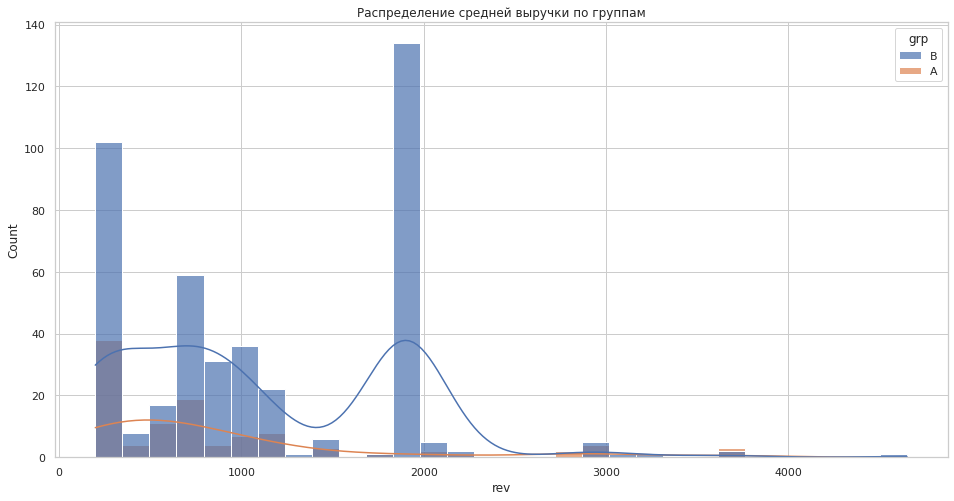

In [20]:
# Посмотрим на распределение данных.
sns.set_theme(style="whitegrid") # устанавливаем стиль для более элегантных графиков
plt.figure(figsize=(16, 8))
sns.histplot(x="rev", hue="grp", data=df_groups_checks, bins=30, kde=True, alpha=0.7)
plt.title('Распределение средней выручки по группам')
plt.show()

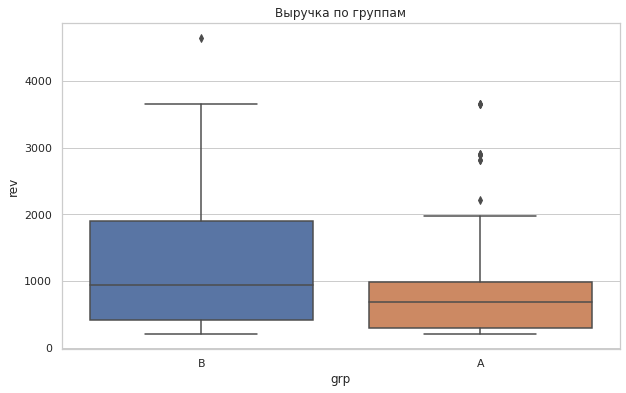

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='grp', y='rev', data=df_groups_checks)
plt.title('Выручка по группам')
plt.show()

In [22]:
# Проверим контрольную и тестовую группу на нормальность
pg.normality(data=df_groups_checks, dv="rev", group="grp", method="shapiro")

,W,pval,normal
grp,,,
B,0.867236,8.947893e-19,False
A,0.719612,5.321688e-13,False


In [23]:
# Проверим равенство дисперсий тестом Левена.
df_cleaned = df_groups_checks.dropna()
pg.homoscedasticity(data=df_cleaned, dv="rev", group="grp")

,W,pval,equal_var
levene,4.478901,0.034774,False


<span style="font-size: 18px;"> 
Тест Шапиро-Уилка показал, что распределения не являются нормальными, а тест Левена определил, что дисперсии не равны.
    
Несмотря на ненормальность данных, мы всё же можем применить t-тест для анализа статистической значимости результатов A/B-теста, т.к. выборки достаточно большие. Кроме того, непараметрический тест не позволит оценить разницу между средними значениями.

Для снижения влияния от неравной размерности выборок применим поправку Уэлча.
</span>

In [24]:
control = df_groups_checks.query("grp == 'A' & rev > 0").rev
test = df_groups_checks.query("grp == 'B' & rev > 0").rev
st.ttest_ind(control, test, equal_var = False)

Ttest_indResult(statistic=-2.8670185482728643, pvalue=0.004731862454849822)

<span style="font-size: 18px;"> 
Значение p-value составило 0,005, что меньше заданного уровня значимости. Это является основанием отвергнуть нулевую гипотезу о равенстве средней выручки в контрольной и тестовой группах.
    
Иными словами, анализ показал, что средний чек  в тестовой группе действительно выше, чем в контрольной, и это различие статистически значимо.

Так как единственным отличием между группами была механика оплаты (допускаем, что соблюдены правила формирования выборок для теста, и они идентичны), то по результатам анализа можно утверждать, что запуск новой механики оплаты на всех пользователей приведёт к росту среднего чека и, как следствие, к росту дохода компании.
</span>

## Задание 2. SQL

2.1 Очень усердные ученики.

2.1.1 Условие

Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких 
маленьких заданий. Каждое такое маленькое задание называется "горошиной".

Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц 
правильно решил 20 горошин.

2.1.2 Задача

Дана таблица peas:
Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных 
студентов.NB! Под усердным студентом мы понимаем студента, который правильно решил 20 задач за текущий месяц.

### 2.1.2 Задача

In [ ]:
SELECT COUNT(st_id)
FROM (SELECT st_id,
             COUNT(correct) AS cnt
      FROM peas
      WHERE correct = 'true' 
      GROUP BY st_id
      HAVING COUNT(correct) >=20) AS diligent_peas
;

2.2 Оптимизация воронки

2.2.1 Условие

Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может 
решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определенной 
дисциплине студенту необходимо приобрести полный доступ. Команда провела эксперимент, где 
был протестирован новый экран оплаты.

2.2.2 Задача

Дана таблицы: peas (см. выше), studs:
и final_project_check:

Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:

ARPU 
ARPAU 
CR в покупку 
СR активного пользователя в покупку 
CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике
ARPU считается относительно всех пользователей, попавших в группы.

Активным считается пользователь, за все время решивший больше 10 задач правильно в любых 
дисциплинах.

Активным по математике считается пользователь, за все время решивший 2 или больше задач 
правильно по математике.

### 2.2.2 Задача

In [ ]:
WITH 
-- Показатели по всем клиентам

all_students AS (
  SELECT
    studs.test_grp,
    COUNT(DISTINCT st_id) AS all_students_cnt
  FROM
    peas
    LEFT JOIN studs USING(st_id)
  GROUP BY
    studs.test_grp
),

-- Показатели по платящим клиентам

paying_students AS (
  SELECT
    studs.test_grp,
    COUNT(DISTINCT sales.st_id) AS paying_students_cnt,
    SUM(sales.money) AS revenue
  FROM
    final_project_check AS sales
    LEFT JOIN studs USING(st_id)
  GROUP BY
    studs.test_grp
),

-- Показатели по активным клиентам

active_students AS (
  SELECT
    test_grp,
    COUNT(DISTINCT st_id) AS active_students_cnt
  FROM
    (
      SELECT
        st_id,
        studs.test_grp,
        COUNT(correct)
      FROM
        peas
        LEFT JOIN studs USING(st_id)
      WHERE
        peas.correct = 'True'
      GROUP BY
        st_id,
        studs.test_grp
      HAVING
        COUNT(peas.correct) > 10
    ) AS act
  GROUP BY
    test_grp
),

-- Показатели по активным клиентам по математике

math_active_students AS (
  SELECT
    test_grp,
    COUNT(DISTINCT st_id) AS math_active_students_cnt
  FROM
    (
      SELECT
        st_id,
        studs.test_grp,
        COUNT(correct)
      FROM
        peas
        LEFT JOIN studs USING(st_id)
      WHERE
        peas.correct = 'True'
        AND peas.subject = 'Math'
      GROUP BY
        st_id,
        studs.test_grp
      HAVING
        COUNT(correct) >= 2
    ) AS act
  GROUP BY
    test_grp
),

-- Показатели по клиентам курса "математика", совершившим покупку

math_paying_students AS(
  SELECT
    studs.test_grp,
    COUNT(DISTINCT st_id) AS math_paying_students_cnt
  FROM
    final_project_check AS sales
    LEFT JOIN studs USING(st_id)
  WHERE
    sales.subject = 'Math'
  GROUP BY
    studs.test_grp
)



SELECT
  test_grp,
  pay_st.revenue / st.all_students_cnt AS arpu,
  pay_st.revenue / act_st.active_students_cnt AS arpau,
  pay_st.paying_students_cnt / st.all_students_cnt :: float * 100 AS cr_purchase,
  pay_st.paying_students_cnt / act_st.active_students_cnt :: float * 100 AS cr_purchase_active,
  m_pay_st.math_paying_students_cnt / math_active_students_cnt :: float * 100 AS cr_purchase_math_active
FROM
  all_students AS st
  JOIN paying_students AS pay_st USING(test_grp)
  JOIN active_students AS act_st USING(test_grp)
  JOIN math_active_students AS m_act_st USING(test_grp)
  JOIN math_paying_students AS m_pay_st USING(test_grp)

## Задание 3. Python

3.1 Задача

1. Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного 
файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров 
пересчитывать метрики.

In [37]:
# 1. Определим функцию для подгрузки доп. файла к общим данным.

def upload_and_process_data(file_path, additional_params):
    
    # Шаг 1: Загрузка данных из CSV файла с Яндекс-диска
    try:
        # Сохраняем базовую ссылку на Яндекс-диск в переменную.
        base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
        
        # Сохраняем ссылку на файл на Яндекс-диске в переменную.
        public_key_groups_add = file_path
        
        # Получаем загрузочную ссылку/ Подготовка ссылки на скачивание
        final_url_groups_add = base_url + urlencode(dict(public_key=public_key_groups_add))
        response_groups_add = requests.get(final_url_groups_add)  # запрос ссылки на скачивание
        download_url_groups_add = response_groups_add.json()['href']  # 'парсинг' ссылки на скачивание
        # Загрузка данных в DataFrame
        df_groups_add = pd.read_csv(download_url_groups_add, sep=',', comment='#' , encoding='cp1251')        
    # Прописываем исключения на случай, если ссылка не сработает          
    except FileNotFoundError:
        print(f"Файл {file_path} не найден.")
        return None
    except pd.errors.EmptyDataError:
        print("Файл пуст.")
        return None
    except Exception as e:
        print(f"Произошла ошибка при загрузке файла: {e}")
        return None
    
    # Шаг 2: Объединяем имеющийся файл с новыми данными, перезаписываем переменную
    df_groups_final_new = pd.concat([df_groups_final, df_groups_add], axis=0, ignore_index=True)
        
    # Шаг 3: Нормализация заголовков 
    expected_columns = {
        'student_id': 'student_id',
        'grp': 'grp'
    }
    
    # Переименовываем колонки, если они отличаются
    df_groups_final_new.rename(columns={col: expected_columns.get(col, col) for col in df_groups_final.columns}, inplace=True)

    # Шаг 4: Объединяем сводный файл с продажами, перезаписываем переменную
    df_groups_checks = pd.merge(df_groups_final_new, df_checks, on = 'student_id', how = 'left')
    
    # Шаг 5: Пересчитываем метрики, сохраним в новую переменную
    metrics_added = df_groups_checks.groupby('grp') \
                          .agg(
                          user_cnt = ('student_id', 'count'),
                          active_cnt = ('active', 'sum'),
                          paying_cnt = ('rev', 'count'),
                          revenue = ('rev', 'sum')
                          )

    metrics_added = pd.merge(metrics_added, paying_active, how = 'left', on = 'grp') \
                .rename(columns = {'rev' : 'paying_active_cnt'})
    metrics_added['revenue'] = metrics_added.revenue.round()
    metrics_added['grp_%'] = round(metrics_added.user_cnt/ metrics_added.user_cnt.sum()*100)
    metrics_added['active_%'] = round(metrics_added.active_cnt / metrics_added.active_cnt.sum()*100)
    metrics_added['paying_%'] = round(metrics_added.paying_cnt / metrics_added.paying_cnt.sum()*100)
    metrics_added['arpu'] = round(metrics_added.revenue/ metrics_added.user_cnt)
    metrics_added['arppu'] = round(metrics_added.revenue/ metrics_added.paying_cnt)
    metrics_added['arpau'] = round(metrics_added.revenue/ metrics_added.active_cnt)
    metrics_added['cr_active'] = round(metrics_added.active_cnt / metrics_added.user_cnt.sum()*100)
    metrics_added['cr_paying'] = round(metrics_added.paying_cnt / metrics_added.user_cnt.sum()*100,2)
    metrics_added['cr_active_to_paying'] = round(metrics_added.paying_active_cnt / metrics_added.active_cnt.sum()*100,2)
    
    # Шаг 3: Пересчет метрик на основании дополнительных параметров
    if 'operation' in additional_params:
        operation = additional_params['operation']
        
        if operation == 'arpu':
            result = metrics_added.arpu
        elif operation == 'arpau':
            result = metrics_added.arpau
        elif operation == 'cr в покупку':
            result = metrics_added.cr_paying
        elif operation == 'cr в активного пользователя':
            result = metrics_added.cr_active    
        elif operation == 'cr активного пользователя в покупку':
            result = metrics_added.cr_active_to_paying        
        else:
            print("Неизвестная операция.")
            return None
    else:
        print("Дополнительные параметры не указаны.")
        return None

    return result

In [48]:
# Пример
additional_params = {'operation': 'arpau'}
result = upload_and_process_data('https://disk.yandex.ru/d/5Kxrz02m3IBUwQ', additional_params)

if result is not None:
    print(result)

grp
A    60.0
B    71.0
Name: arpau, dtype: float64


2. Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [82]:
def visualization(df, title='Метрика по контрольной и тестовой группам', xlabel='Группа', ylabel='Значение', kind = 'bar'):
    plt.figure(figsize=(10, 6))
    ax = df.plot(kind=kind)
    for i, value in enumerate(df):
        # Добавляем подпись
        ax.text(i, value, f'{value:.2f}', fontsize=10, ha='center', va='bottom')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

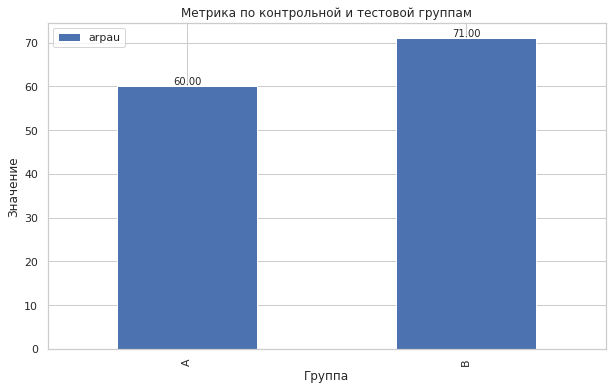

In [83]:
# Пример
visualization(result)